<a href="https://colab.research.google.com/github/fikhrihanif/DIF62130_Kelas_A_25_2311533007/blob/main/Praktikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#load dataset
dataset_url = 'https://raw.githubusercontent.com/fikhrihanif/DIF62130_Kelas_A_25_2311533007/refs/heads/main/dataset/diabetes.csv'
df = pd.read_csv(dataset_url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


import pandas as pd: Mengimpor library pandas dan menamainya pd agar mudah digunakan.Pandas digunakan untuk manipulasi dan analisis data.

dataset_url = ...: Menyimpan alamat web (URL) file data ke dalam variabel dataset_url.

df = pd.read_csv(dataset_url): Membaca file CSV dari dataset_url menggunakan pandas dan menyimpannya dalam variabel df sebagai DataFrame.

df.head(): Menampilkan 5 baris pertama data dari DataFrame df untuk melihat sekilas isinya.

In [ ]:
#split dataset in feature and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']
X = df[feature_cols] #Feature
y = df.Outcome # Target Variabel

feature_cols: Mendefinisikan daftar nama kolom yang akan digunakan sebagai fitur.

X: Menyimpan data fitur yang diambil dari dataset berdasarkan feature_cols.

y: Menyimpan data target variabel yang ingin diprediksi.

In [ ]:
print (X.shape)
print (y.shape)

(768, 7)
(768,)


print(X.shape): Menampilkan ukuran data fitur (jumlah baris, jumlah kolom).

print(y.shape): Menampilkan ukuran data target (jumlah baris).

Splitting Data

In [ ]:
#Split X and y into trining and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

from sklearn.model_selection import train_test_split:

Mengimpor fungsi train_test_split dari library sklearn. Fungsi ini berguna untuk membagi data menjadi data latih dan data uji.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16):

Memanggil fungsi train_test_split untuk membagi data.

X: Data fitur.

y: Data target.

test_size=0.30: 30% data akan digunakan sebagai data uji.

random_state=16: Menentukan angka acak untuk memastikan hasil pembagian data konsisten.

Output:

X_train: Data fitur untuk latih.

X_test: Data fitur untuk uji.

y_train: Data target untuk latih.

y_test: Data target untuk uji.

Model development and prediction

In [ ]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression()

Mengimpor kelas LogisticRegression dari modul sklearn.linear_model. Kelas ini digunakan untuk membuat model regresi logistik.

Membuat instance (objek) dari kelas LogisticRegression dan menyimpannya dalam variabel logreg. Ini seperti membuat 'template' model regresi logistik yang siap digunakan.

Melatih model regresi logistik (logreg) menggunakan data training (X_train untuk fitur dan y_train untuk target). Proses ini akan 'mengajari' model untuk mengenali pola dari data dan membuat prediksi.

Model Evaluation using Confusion Matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

Mengimpor: Memuat kelas LogisticRegression dari library sklearn.

Membuat Model: Membuat objek model regresi logistik dan menyimpannya di variabel logreg.

Melatih Model: Model logreg dilatih menggunakan data pelatihan (X_train, y_train) untuk mempelajari pola dan hubungan antara fitur dan target.

Memprediksi: Setelah dilatih, model digunakan untuk memprediksi target pada data uji (X_test), dan hasilnya disimpan di y_pred.

In [ ]:
#import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[134,  13],
       [ 35,  49]])

from sklearn import metrics:
Mengimpor modul metrics dari library sklearn (scikit-learn). Modul ini berisi berbagai fungsi untuk mengevaluasi kinerja model machine learning, termasuk fungsi untuk membuat confusion matrix.

cnf_matrix = metrics.confusion_matrix(y_test, y_pred): Membuat confusion matrix dengan menggunakan fungsi confusion_matrix dari modul metrics.

y_test: berisi data label/target yang sebenarnya dari data testing.

y_pred: berisi data label/target yang diprediksi oleh model untuk data testing. Hasil confusion matrix disimpan dalam variabel cnf_matrix.

cnf_matrix: Menampilkan isi dari variabel cnf_matrix, yaitu confusion matrix yang telah dibuat. Confusion matrix ini memberikan informasi tentang kinerja model dalam mengklasifikasikan data, dengan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.

Text(0.5, 23.52222222222222, 'Predicted label')

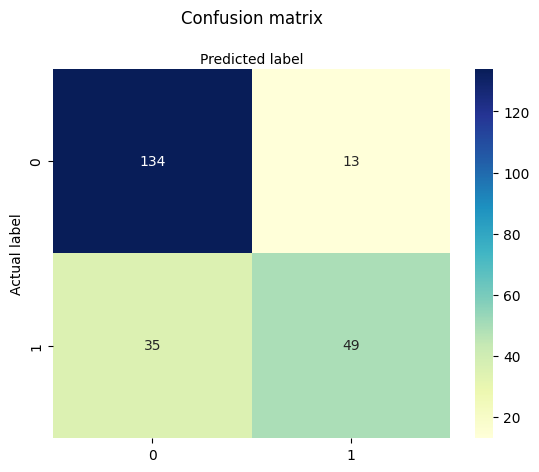

In [ ]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Import library: numpy, matplotlib.pyplot, dan seaborn diimpor untuk operasi array, plotting, dan visualisasi heatmap.

Persiapan data: class_names didefinisikan untuk label kelas, dan figure & axes dibuat untuk plot. Tick marks dan label sumbu diatur menggunakan data class_names.

Membuat heatmap: sns.heatmap digunakan untuk menghasilkan heatmap dari cnf_matrix dengan menampilkan angka di setiap sel dan menggunakan colormap "YlGnBu".

Penyelesaian plot: Label sumbu, judul, dan tata letak plot diatur agar informatif dan mudah dibaca.

In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))
#

                  precision    recall  f1-score   support

without diabetes       0.79      0.91      0.85       147
   with diabetes       0.79      0.58      0.67        84

        accuracy                           0.79       231
       macro avg       0.79      0.75      0.76       231
    weighted avg       0.79      0.79      0.78       231



from sklearn.metrics import classification_report: Fungsi ini mengimpor classification_report dari modul sklearn.metrics. classification_report digunakan untuk membuat laporan yang berisi metrik evaluasi model klasifikasi seperti precision, recall, f1-score, dan support.

target_names = ['without diabetes', 'with diabetes']: Baris ini mendefinisikan list target_names yang berisi label kelas untuk target variabel. Dalam kasus ini, 'without diabetes' merepresentasikan kelas 0 dan 'with diabetes' merepresentasikan kelas 1.

print(classification_report(y_test, y_pred, target_names=target_names)): Fungsi ini mencetak classification report ke layar.

y_test: berisi nilai aktual dari target variabel pada data testing.

y_pred: berisi nilai prediksi dari model untuk data testing.

target_names: digunakan untuk memberikan label yang mudah dibaca pada classification report.

ROC curve

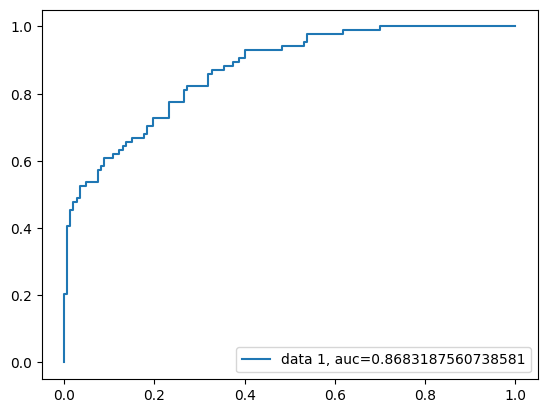

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Menghitung probabilitas prediksi: logreg.predict_proba(X_test)[::,1] digunakan untuk mendapatkan probabilitas setiap data uji masuk ke kelas positif (diabetes).

Menghitung FPR, TPR, dan Thresholds: metrics.roc_curve digunakan untuk menghitung False Positive Rate (FPR), True Positive Rate (TPR), dan thresholds berdasarkan probabilitas prediksi dan label sebenarnya.

Menghitung AUC: metrics.roc_auc_score menghitung luas area di bawah kurva ROC, yang menunjukkan seberapa baik model dalam membedakan kedua kelas.

Membuat plot kurva ROC: plt.plot digunakan untuk menampilkan kurva ROC dengan FPR pada sumbu x dan TPR pada sumbu y. Nilai AUC ditambahkan dalam label kurva.

Menampilkan legenda dan plot: plt.legend dan plt.show digunakan untuk menampilkan legenda dan plot kurva ROC secara visual.